# Chapter 4: Introduction to Prediction Problems

# <center> ![picture](pictures/title.jpg)

Machine learning provides solutions to many problems, which sometimes may seem complex. As a list, this includes supervised learning (with classification and regression), semi-supervised learning, unsupervised learning, structural learning, ranking learning, relational learning, active learning, and temporal learning (with time series prediction and reinforcement learning). For some of these sets, such as active learning and reinforcement learning, data collection is a central part of the algorithm and can significantly determine the quality of learned prediction models. Most other sets assume that data have been collected without our ability to influence that set, and now we just need to analyze and learn the best predictors. In this inactive set, we can assume that the data are i.i.d. - the most common case - or there are dependencies between data points, such as time series prediction or relational statistical learning. There are also cases where data are missing, for example, because the user did not fill in their age.

Therefore, a diagnosis can consider the following dimensions for categorizing machine learning problems:

- Inactive versus active
- i.i.d. versus non-i.i.d
- Complete versus incomplete

Like all diagnoses, not every problem fits completely into these categories. There is also the possibility that most data collections are not completely inactive (even if we wanted them to be), are i.i.d. (even if we wanted them to be), and have some missing parts. However, algorithms deal with these approximations at different levels, even if the data do not approximate these approximations. For most of these notes, we focus on the simplest sets: inactive, i.i.d., and complete in this chapter. We first introduce classification and regression, then discuss selection criteria for classification and regression to create advanced algorithms developed in later chapters.

## 4-1: Learning Problems

In machine learning, a dataset is typically a collection of observations, where each observation is a set of features (also known as variables or attributes) and a target value. The features are the input to the machine learning model, and the target is the value that the model is trying to predict. 

The dataset can be represented as a set $\mathcal{D} =\ (x_1, y_1), (x_2, y_2), ...., (x_n, y_n)$. Here, $(x_i\ \in\ \mathcal{X})$ is the i-th observation and $(y_i\ \in\ Y)$ is the target. Usually, we assume that $(\mathcal{X}\ =\ R^d)$, in which case $(x_i\ =\ (x{i1},\ x{i2},\ .\ .\ .\ .\ .\ ,\ x{id}))$ is a d-dimensional sample. A sample each dimension of $(x_j)$ is usually named a feature. 

The data set is often organized in a matrix $(X\ \in\ R^{n\times d})$ that organizes the rows with samples $(x{i\ })$ and the columns with features. This matrix, also known as a feature matrix, is a common way to represent a dataset in machine learning.

The distinction between $(x)$ and $(y)$ is because we usually assume that features are relatively easy to collect for each thing (for example, measuring the height of a person or the square footage of a house), while collecting the target variable is difficult or costly (for example, the presence of a disease or the final price of a house before selling it). Such situations usually require the construction of a computational model that predicts targets from a set of input values that have been previously collected. This model is trained with a set of input observations that have already been collected, and can be used to predict targets from information that is difficult to come by.

### 4-1-1: Regression and Classification

The difference in algorithms for prediction problems, with complete i.i.d. data, usually comes from the input features (observations) and the target attributes. For example, it may be necessary to examine text observations - such as a set of documents - differently from a d-dimensional vector of real values that reflects readings of a physical system that inverts temperature and pressure. One simple and relatively common strategy for dealing with these differences is to plot different types of observations - language, categorical variables, and even time series - in a multidimensional space in which observations are again represented as a d-dimensional vector with real values. Many prediction algorithms have been designed for observations with real values, so we can apply standard algorithms. This problem of displaying data is a fundamental and difficult issue. We will discuss it more in Chapter 9. For now, we assume that observations are already in a suitable form, as a d-dimensional vector with real values.

Target attributes are also important and lead to two common distinctions for prediction problems: classification and regression. In general, when $(\mathcal{Y})$ is partitioned, we have a regression problem and when $(\mathcal{Y})$ is discrete, a classification problem. For example, in a house price prediction problem, $(\mathcal{Y})$ could be the set of real numbers or the set $([0, ∞))$, which would make it a regression problem. In a disease diagnosis problem, $(\mathcal{Y})$ could be the set ${\text{healthy}, \text{diseased}}$, which would make it a classification problem

Let's consider a simple example of a regression problem where we predict house prices based on the size of the house. We will use the seaborn library for visualization.

/home/ali/anaconda3/envs/my_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ali/anaconda3/envs/my_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


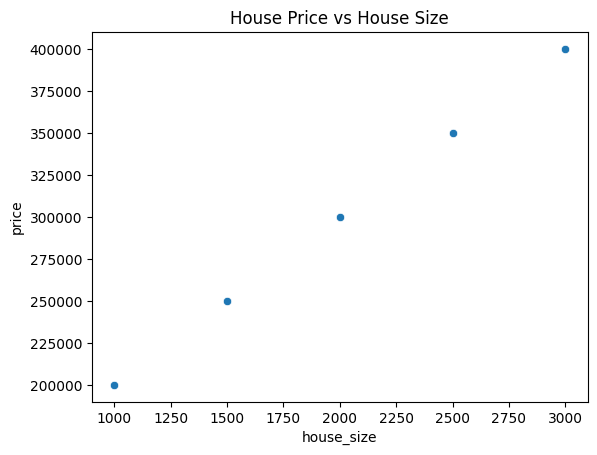

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame
data = {
    'house_size': [1000, 1500, 2000, 2500, 3000],
    'price': [200000, 250000, 300000, 350000, 400000]
}
df = pd.DataFrame(data)

# Visualize the DataFrame
sns.scatterplot(data=df, x='house_size', y='price')
plt.title('House Price vs House Size')
plt.show()


For a classification problem, let's consider a simple example where we classify whether a customer will make a purchase or not based on their age and income.

/home/ali/anaconda3/envs/my_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ali/anaconda3/envs/my_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ali/anaconda3/envs/my_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ali/anaconda3/envs/my_learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

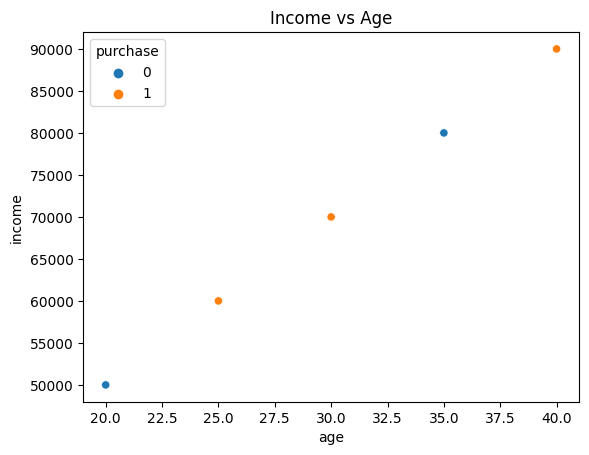

In [27]:
# Create a DataFrame
data = {
    'age': [20, 25, 30, 35, 40],
    'income': [50000, 60000, 70000, 80000, 90000],
    'purchase': [0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Visualize the DataFrame
sns.scatterplot(data=df, x='age', y='income', hue='purchase')
plt.title('Income vs Age')
plt.show()


### 4-1-2: Regression Problem

A typical example of a regression problem is predicting the price of a house in a particular area. The features could be the size of the house (in square feet), the age of the house (in years), the distance from the city center (in miles), the average income in a one-mile square (in tens of thousands of dollars), and the population in the same area. The target is the price at which a house is sold, for example.

### 4-1-3: Classification Problem

In a classification problem, we create a function that predicts class labels. This function is usually called a classifier. The cardinality of $(\mathcal{Y})$ in classification problems is usually small. For example, in a customer segmentation problem with a dataset for $(n)$ observations and $(d)$.

## 4-2: Learning Problems with Missing Data

There are also cases where data are missing, for example, because the user did not fill in their age. In such cases, we can use different strategies. One simple strategy is to ignore the missing values and only use the available data for training. Another strategy is to use a method that can handle missing values, such as mean imputation or more sophisticated methods that can estimate the missing values based on the available data. We will discuss these methods in more detail in Chapter 5.

### 4-2-1: Regression Problem with Missing Data

In a regression problem with missing data, we can use the same strategies as in the previous section. For example, in a house price prediction problem, if some of the features such as the age of the house or the distance from the city center are missing, we can use one of the strategies described above to handle the missing data.



### 4-2-2: Classification Problem with Missing Data

In a classification problem with missing data, we can also use the same strategies as in the previous section. For example, in a customer segmentation problem, if some of the features are missing, we can use one of the strategies described above to handle the missing data.



For missing data, we can use the mean imputation strategy. Here's an example using the pandas library.

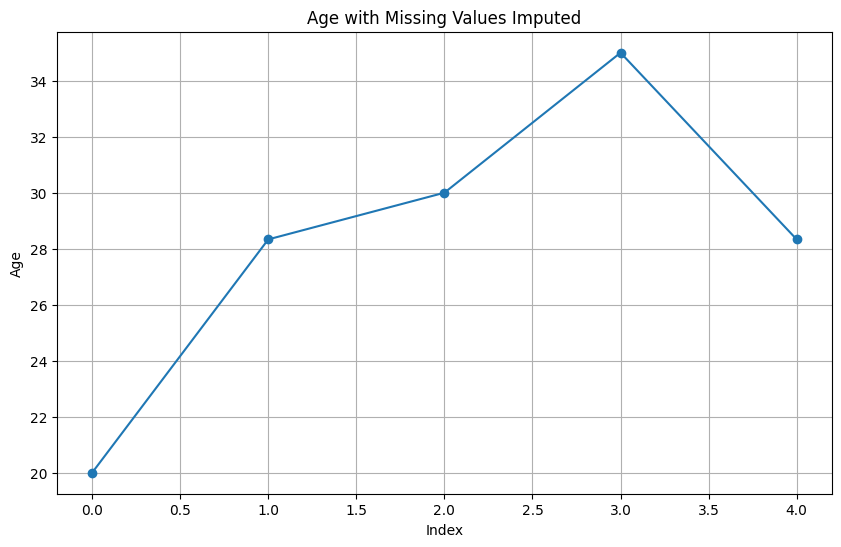

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
data = {
    'age': [20, np.nan, 30, 35, np.nan]
}
df = pd.DataFrame(data)

# Impute missing values with mean
df['age'].fillna(df['age'].mean(), inplace=True)

# Visualize the DataFrame
plt.figure(figsize=(10,6))
plt.plot(df['age'], marker='o')
plt.title('Age with Missing Values Imputed')
plt.xlabel('Index')
plt.ylabel('Age')
plt.grid(True)
plt.show()


## 4-3: Learning Problems with Non-i.i.d. Data


There are also cases where the data are not i.i.d. This is the case, for example, when the data points are time series data, or when there is a dependency between the data points. For example, in a time series prediction problem, the value of a time series at time $(t)$ depends on its values at previous times. In a relational statistical learning problem, the value of a feature for an object depends on the values of other features for the same object. In such cases, we can use methods that take into account the dependencies between the data points. We will discuss these methods in more detail in Chapter 6.



### 4-3-1: Regression Problem with Non-i.i.d. Data

In a regression problem with non-i.i.d. data, we can use the same methods as in the previous section. For example, in a house price prediction problem, if the data points are time series data, we can use methods that take into account the dependencies between the time series data points to predict the house prices.



### 4-3-2: Classification Problem with Non-i.i.d. Data


In a classification problem with non-i.i.d. data, we can also use the same methods as in the previous section. For example, in a customer segmentation problem, if the data points have a dependency, we can use methods that take into account the dependencies between the data points to segment the customers

For non-i.i.d. data, we can use methods that take into account the dependencies between the data points. Here's an example using the statsmodels library.

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

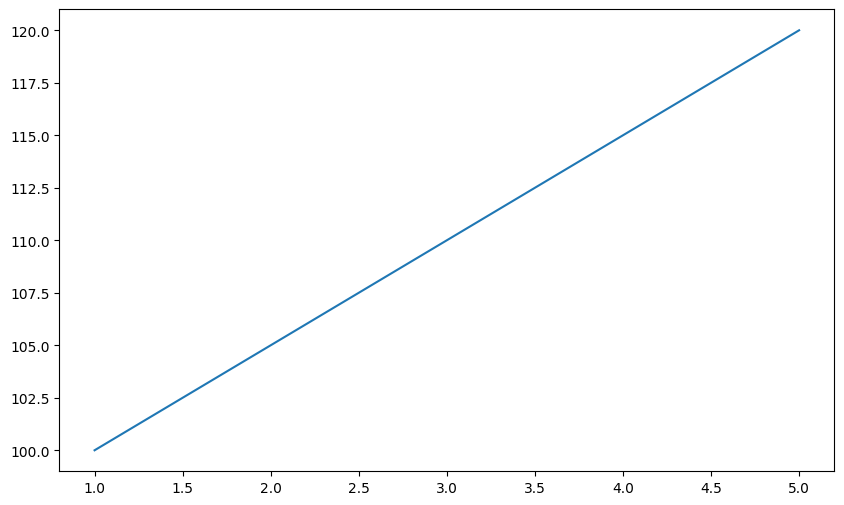

In [29]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Create a DataFrame
data = {
    'time': [1, 2, 3, 4, 5],
    'price': [100, 105, 110, 115, 120]
}
df = pd.DataFrame(data)

# Fit an AutoReg model
model = AutoReg(df['price'], lags=1)
model_fit = model.fit()

# Visualize the original data
plt.figure(figsize=(10,6))
plt.plot(df['time'], df['price'], label='Original data')

# Visualize the fitted model
plt.plot(df['time'], model_fit.fittedvalues, label='Fitted model')

plt.title('Price with Autoregressive Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## 4-4: Learning Problems with Incomplete Data

There are also cases where the data are incomplete. This is the case, for example, when some of the features are missing. In such cases, we can use different strategies. One simple strategy is to ignore the missing values and only use the available data for training. Another strategy is to use a method that can handle missing values, such as mean imputation or more sophisticated methods that can estimate the missing values based on the available data. We will discuss these methods in more detail in Chapter 5.



### 4-4-1: Regression Problem with Incomplete Data

In a regression problem with incomplete data, we can use the same strategies as in the previous section. For example, in a house price prediction problem, if some of the features such as the age of the house or the distance from the city center are missing, we can use one of the strategies described above to handle the missing data.



### 4-4-2: Classification Problem with Incomplete Data

In a classification problem with incomplete data, we can also use the same strategies as in the previous section. For example, in a customer segmentation problem, if some of the features are missing, we can use one of the strategies described above to handle the missing data.



One more advanced method for handling incomplete data is the Missingness-Pattern-Adaptive Learning With Incomplete Data method. This method constructs multiple hypergraphs to represent the high-order relationships among subjects by dividing them into several groups according to the availability of their data modalities. A hypergraph regularized transductive learning method is then applied to these groups for automatic diagnosis of brain diseases

In conclusion, dealing with incomplete data is a common problem in machine learning, and various strategies can be used to handle it, depending on the specific problem and the nature of the data. In the next chapter, we will discuss these methods in more detail and provide examples of how they can be applied in practice.

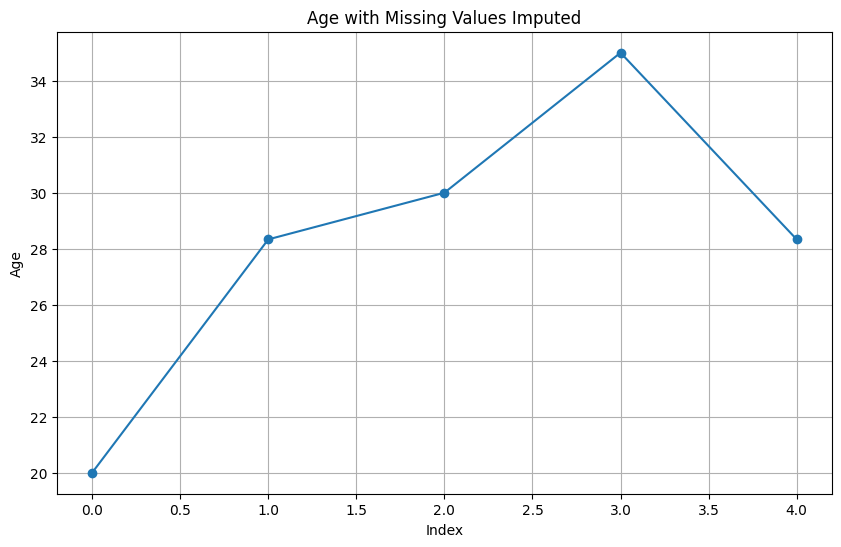

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Create a DataFrame
data = {
    'age': [20, np.nan, 30, 35, np.nan]
}
df = pd.DataFrame(data)

# Impute missing values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

# Visualize the DataFrame
plt.figure(figsize=(10,6))
plt.plot(df['age'], marker='o')
plt.title('Age with Missing Values Imputed')
plt.xlabel('Index')
plt.ylabel('Age')
plt.grid(True)
plt.show()
